## Asserting with the assert statement

- `pytest` allows you to use the standard Python assert for verifying expectations and values in Python tests.
- For example, you can write the following:


In [ ]:
# content of test_assert1.py
def f():
    return 3


def test_function():
    assert f() == 4

- to assert that your function returns a certain value. If this assertion fails you will **see the return value of the function call**:
- `pytest test_assert1.py`

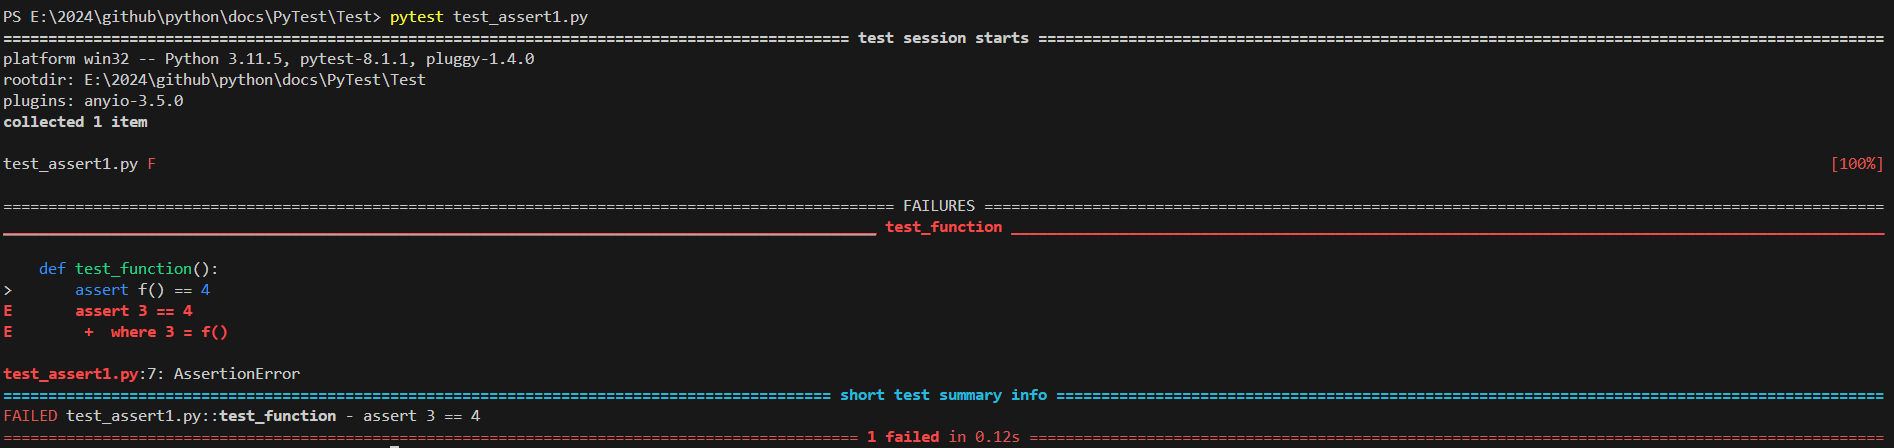


- `pytest` has support for showing the values of the most common `subexpressions` including `calls`, `attributes`, `comparisons`, and `binary` and `unary` operators.
- This allows you to use the **idiomatic** python constructs without boilerplate code while not losing introspection information.
- However, if you specify a message with the assertion like this: (**Never do it!**)
  - `assert a % 2 == 0, "value was odd, should be even"`
  - then no assertion introspection takes places at all and the message will be simply shown in the traceback.


## Assertions about expected exceptions

In order to write assertions about raised exceptions, you can use `pytest.raises()` as a context manager like this:


In [1]:
import pytest

def test_zero_division():
    with pytest.raises(ZeroDivisionError):
        1 / 0

and if you need to have access to the actual exception info you may use:

- `excinfo` is an `ExceptionInfo` instance, which is a wrapper around the actual exception raised.
- The main attributes of interest are `.type`, `.value` and `.traceback`.


In [2]:
def test_recursion_depth():
    with pytest.raises(RuntimeError) as excinfo:

        def f():
            f()

        f()
    assert "maximum recursion" in str(excinfo.value)